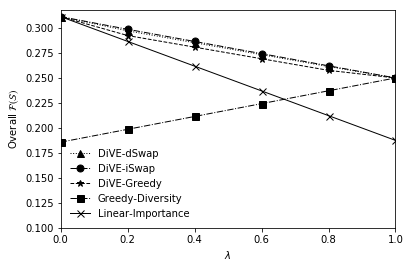

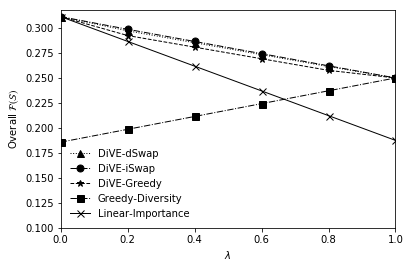

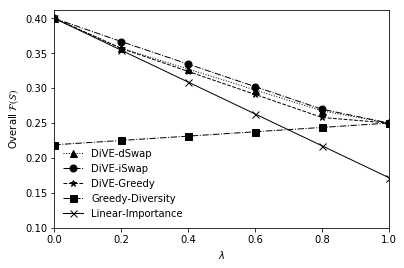

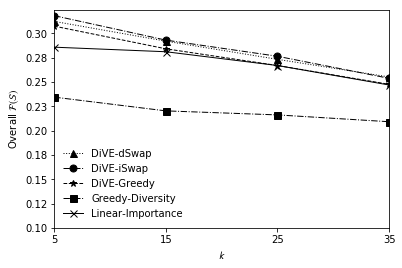

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter



input_file = "mei_objf_flights.csv"
output_plot_objf = "1_objf_flights.svg"
output_plot_tradeoff = "1_tradeoff_flights.svg"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.0)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff['1.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],1.0)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df_tradeoff['i-DiVE Greedy']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE-SwapI']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE-SwapD']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE Greedy']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df_tradeoff['i-DiVE-SwapI']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df_tradeoff['i-DiVE-SwapD']['1.0'] = df_tradeoff['Only Diversity']['1.0']

df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']

df = df.rename(columns={'i-DiVE Greedy':'DiVE-Greedy', 'Only Interestingness':'Linear-Importance', 'i-DiVE-SwapD':'DiVE-dSwap','i-DiVE-SwapI':'DiVE-iSwap','Only Diversity':'Greedy-Diversity'})
df = df[['DiVE-dSwap','DiVE-iSwap','DiVE-Greedy','Greedy-Diversity','Linear-Importance']]
#df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})

# writer = pd.ExcelWriter('tradeoff_flights.xlsx')
# df.to_excel(writer,'Sheet1', index=1)
# writer.save()

ax = df.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
plt.legend(frameon=False)
ax.set_ylim(ymin=0.10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig(output_plot_tradeoff, format="svg", dpi = 1000)
plt.show()

df_objf = df_all_objf.copy()
df_objf['util'] = df_objf['util']*0.5
df_objf['div'] = df_objf['div']*0.5
df_objf['objf_value'] = df_objf['util'] + df_objf['div']
df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
df_objf = df_objf.pivot(index='k', columns='algo')
df_objf = df_objf['objf_value']
#df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

df_objf = df_objf.rename(columns={'i-DiVE Greedy':'DiVE-Greedy', 'Only Interestingness':'Linear-Importance', 'i-DiVE-SwapD':'DiVE-dSwap','i-DiVE-SwapI':'DiVE-iSwap','Only Diversity':'Greedy-Diversity'})
df_objf = df_objf[['DiVE-dSwap','DiVE-iSwap','DiVE-Greedy','Greedy-Diversity','Linear-Importance']]
#df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']


ax = df_objf.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df_objf.columns, loc='best')
plt.xlabel(r'$\mathcal{k}$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
plt.xticks([5,15,25,35])
plt.legend(frameon=False)
ax.set_ylim(ymin=0.10)
#ax.set_ylim(ymax=0.50)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig(output_plot_objf, format="svg", dpi = 1000)
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "mei_objf_heart_high.csv"
output_plot_objf = "1_objf_heart_2.svg"
output_plot_tradeoff = "1_tradeoff_heart_2.svg"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.0)
df_tradeoff['0.1'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.1)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.3'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.3)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff['1.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],1.0)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df_tradeoff['i-DiVE Greedy']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE-SwapI']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE-SwapD']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE Greedy']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df_tradeoff['i-DiVE-SwapI']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df_tradeoff['i-DiVE-SwapD']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

# my_color = ['black', 'black', 'black', 'black', 'black', 'black']


# markers = ['^','o','*','s','x']
# linestyles = [':','-.','--','-.','-']
# df = df.rename(columns={'i-DiVE Greedy':'DiVE-Greedy', 'Only Interestingness':'Linear-Importance', 'i-DiVE-SwapD':'DiVE-dSwap','i-DiVE-SwapI':'DiVE-iSwap','Only Diversity':'Greedy-Diversity'})
# df = df[['DiVE-dSwap','DiVE-iSwap','DiVE-Greedy','Greedy-Diversity','Linear-Importance']]
# #df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


# ax = df.plot(kind='line', markersize=7, linewidth=1, color=my_color)
# for i, line in enumerate(ax.get_lines()):
#     line.set_marker(markers[i])

# for i, line in enumerate(ax.get_lines()):
#     line.set_linestyle(linestyles[i])

# # for adding legend
# ax.legend(ax.get_lines(), df.columns, loc='best')
# plt.xlabel('$\lambda$', fontsize=10)
# plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
# #plt.xticks([0.2,0.4,0.6,0.8])
# plt.legend(frameon=False)
# ax.set_ylim(ymin=0.10)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# plt.savefig(output_plot_tradeoff, format="svg", dpi = 1000)
# plt.show()

df

# df_objf = df_all_objf.copy()
# df_objf['util'] = df_objf['util']*0.5
# df_objf['div'] = df_objf['div']*0.5
# df_objf['objf_value'] = df_objf['util'] + df_objf['div']
# df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
# df_objf = df_objf.pivot(index='k', columns='algo')
# df_objf = df_objf['objf_value']
# #df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

# df_objf = df_objf.rename(columns={'i-DiVE Greedy':'DiVE-Greedy', 'Only Interestingness':'Linear-Importance', 'i-DiVE-SwapD':'DiVE-dSwap','i-DiVE-SwapI':'DiVE-iSwap','Only Diversity':'Greedy-Diversity'})
# df_objf = df_objf[['DiVE-dSwap','DiVE-iSwap','DiVE-Greedy','Greedy-Diversity','Linear-Importance']]
# #df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


# markers = ['^','o','*','s','x']
# linestyles = [':','-.','--','-.','-']


# ax = df_objf.plot(kind='line', markersize=7, linewidth=1, color=my_color)
# for i, line in enumerate(ax.get_lines()):
#     line.set_marker(markers[i])

# for i, line in enumerate(ax.get_lines()):
#     line.set_linestyle(linestyles[i])

# # for adding legend
# ax.legend(ax.get_lines(), df_objf.columns, loc='best')
# plt.xlabel(r'$\mathcal{k}$', fontsize=10)
# plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
# plt.xticks([5,15,25,35])
# plt.legend(frameon=False)
# ax.set_ylim(ymin=0.10)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# plt.savefig(output_plot_objf, format="svg", dpi = 1000)
# plt.show()

algo,Only Interestingness,Only Diversity,i-DiVE Greedy,i-DiVE-SwapI,i-DiVE-SwapD
0.0,0.311386,0.185740,0.311386,0.311386,0.311386
0.1,0.298997,0.192166,0.298274,0.304809,0.303135
0.2,0.286609,0.198592,0.292466,0.298719,0.297181
0.3,0.274220,0.205018,0.286658,0.292629,0.291226
0.4,0.261832,0.211444,0.280849,0.286539,0.285272
0.6,0.237054,0.224296,0.269233,0.274359,0.273363
0.8,0.212277,0.237148,0.257616,0.262179,0.261454
1.0,0.187500,0.250000,0.250000,0.250000,0.250000


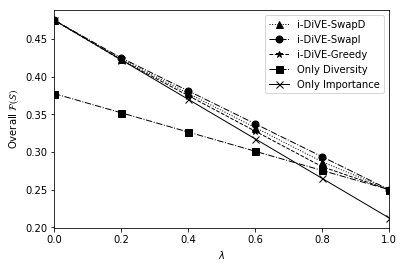

algo,i-DiVE-SwapD,i-DiVE-SwapI,i-DiVE-Greedy,Only Diversity,Only Importance
0.0,0.474900,0.474900,0.474900,0.3775,0.47490
0.2,0.423225,0.424892,0.422028,0.3520,0.42242
0.4,0.377835,0.381169,0.374854,0.3265,0.36994
0.6,0.332446,0.337446,0.327680,0.3010,0.31746
0.8,0.287056,0.293723,0.280507,0.2755,0.26498
1.0,0.250000,0.250000,0.250000,0.2500,0.21250


In [50]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "mei_objf_superstore.csv"
output_plot_objf = "mei_objf_superstore.svg"
output_plot_tradeoff = "mei_tradeoff_superstore.svg"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.0)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff['1.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],1.0)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df_tradeoff['i-DiVE Greedy']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE-SwapI']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE-SwapD']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE Greedy']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df_tradeoff['i-DiVE-SwapI']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df_tradeoff['i-DiVE-SwapD']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']
df = df.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
df = df[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
#df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


ax = df.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
plt.savefig(output_plot_tradeoff, format="svg", dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()

# df_objf = df_all_objf.copy()
# df_objf['util'] = df_objf['util']*0.5
# df_objf['div'] = df_objf['div']*0.5
# df_objf['objf_value'] = df_objf['util'] + df_objf['div']
# df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
# df_objf = df_objf.pivot(index='k', columns='algo')
# df_objf = df_objf['objf_value']
# #df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

# df_objf = df_objf.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
# df_objf = df_objf[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
# #df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


# markers = ['^','o','*','s','x']
# linestyles = [':','-.','--','-.','-']


# ax = df_objf.plot(kind='line', markersize=7, linewidth=1, color=my_color)
# for i, line in enumerate(ax.get_lines()):
#     line.set_marker(markers[i])

# for i, line in enumerate(ax.get_lines()):
#     line.set_linestyle(linestyles[i])

# # for adding legend
# ax.legend(ax.get_lines(), df_objf.columns, loc='best')
# plt.xlabel(r'$\mathcal{k}$', fontsize=10)
# plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
# plt.xticks([5,15,25,35])
# plt.savefig(output_plot_objf, format="svg", dpi = 1000)
# #ax.set_ylim(ymin=0)
# plt.show()
df

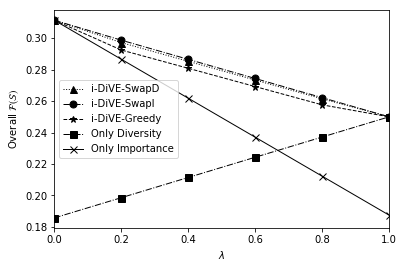

algo,i-DiVE-SwapD,i-DiVE-SwapI,i-DiVE-Greedy,Only Diversity,Only Importance
0.0,0.311386,0.311386,0.311386,0.185740,0.311386
0.2,0.297181,0.298719,0.292466,0.198592,0.286609
0.4,0.285272,0.286539,0.280849,0.211444,0.261832
0.6,0.273363,0.274359,0.269233,0.224296,0.237054
0.8,0.261454,0.262179,0.257616,0.237148,0.212277
1.0,0.250000,0.250000,0.250000,0.250000,0.187500


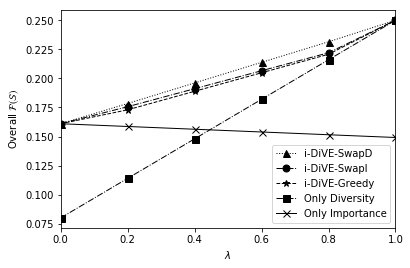

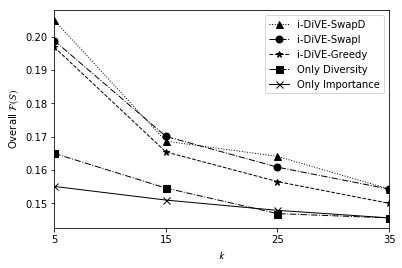

In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "mei_objf_heart_middle.csv"
output_plot_objf = "mei_objf_heart.svg"
output_plot_tradeoff = "mei_tradeoff_heart.svg"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.0)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff['1.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],1.0)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df_tradeoff['i-DiVE Greedy']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE-SwapI']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE-SwapD']['0.0'] = df_tradeoff['Only Interestingness']['0.0']
df_tradeoff['i-DiVE Greedy']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df_tradeoff['i-DiVE-SwapI']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df_tradeoff['i-DiVE-SwapD']['1.0'] = df_tradeoff['Only Diversity']['1.0']
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']
df = df.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
df = df[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
#df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


ax = df.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
plt.savefig(output_plot_tradeoff, format="svg", dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()

df_objf = df_all_objf.copy()
df_objf['util'] = df_objf['util']*0.5
df_objf['div'] = df_objf['div']*0.5
df_objf['objf_value'] = df_objf['util'] + df_objf['div']
df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
df_objf = df_objf.pivot(index='k', columns='algo')
df_objf = df_objf['objf_value']
#df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

df_objf = df_objf.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
df_objf = df_objf[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
#df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']


ax = df_objf.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df_objf.columns, loc='best')
plt.xlabel(r'$\mathcal{k}$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
plt.xticks([5,15,25,35])
plt.savefig(output_plot_objf, format="svg", dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()